In [7]:
import os
import numpy as np
import mne
import math 
import scipy
import pyprep
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from utils import *
from sklearn.metrics import accuracy_score


### Create Dataset

In [2]:
event_dict = {
    'Baseline':1,
    'Left': 2,
    'Right': -2,
}
freqs = np.arange(8., 30., 1.)  
freq_bins = [ (8, 12), (12,30)]

In [3]:
n_sub = [1, 2, 3]
condition=['test','training']
session = ['pre','post']


In [4]:
for sub in n_sub:
    for cond in condition:
        for ses in session:
            filepath =f"/Users/saracruz/Downloads/stroke-rehab/P{sub}_{ses}_{cond}.mat"
            savepath =f"/Users/saracruz/Downloads/stroke-rehab/Dataset/P{sub}_{ses}_{cond}.pkl"
        
            # Load .mat
            data = scipy.io.loadmat(filepath)
            y = data['y']
            trig = data['trig'].flatten()
            sfreq = data['fs'].item()

            # Preprocess with MNE
            raw, sfreq = build_mne_object_from_data(y, channels_to_use, sfreq)
            montage = mne.channels.make_standard_montage('standard_1020')
            raw.set_montage(montage)

            # Filter
            iir_params = dict(order=50, ftype='butter')
            raw.filter(l_freq=8., h_freq=30., method='iir', iir_params=iir_params)

            # Events
            new_trig = extract_clean_events(trig, sfreq)
            event_indices = np.arange(len(new_trig))
            event_codes = new_trig
            new_events = np.column_stack((event_indices, np.zeros_like(event_indices), event_codes)).astype(int)

            epochs = mne.Epochs(
                raw, new_events,
                baseline=(None, None),
                tmin=0,
                tmax=1.5,
                event_id=event_dict,
                preload=True
            )

            all_rows = []
            all_labels = []

            for label_name, event_id in event_dict.items():
                label_epochs = epochs[label_name]  # Shape: (n_epochs, n_channels, n_times)
                print(label_epochs)

                for i in range(len(label_epochs)):
                    single_epoch = label_epochs[i:i+1]  # MNE Epochs object with one epoch

                    # Extract features
                    power_vec, power_labels = extract_power_features(single_epoch, freqs, freq_bins, channels_to_use)
                    temp_vec, temp_labels = extract_temp_features(single_epoch.get_data()[0], sfreq, channels_to_use)

                    features = np.concatenate([power_vec, temp_vec])
                    labels = power_labels + temp_labels

                    all_rows.append(features)
                    all_labels.append(label_name)

            # Create MultiIndex for columns
            col_index = pd.MultiIndex.from_tuples(labels, names=["feature_type", "channel", "detail"])
            df = pd.DataFrame(all_rows, columns=col_index)
            df["label"] = all_labels
            df.to_pickle(savepath)

Creating RawArray with float64 data, n_channels=16, n_times=204560
    Range : 0 ... 204559 =      0.000 ...   799.059 secs
Ready.
Frequency of Sampling: 256.0 Hz
Duration: 799.0625 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 200 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB



/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

### Start training

In [8]:
from sklearn.preprocessing import LabelEncoder
import torch
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_pickle('/Users/saracruz/Downloads/stroke-rehab/Dataset/P3_post_training.pkl')
df_test = pd.read_pickle('/Users/saracruz/Downloads/stroke-rehab/Dataset/P3_post_test.pkl')
features_df = df.drop(columns="label")
features_df = map_labels_to_segments(df)
features_df_test = map_labels_to_segments(df_test)
reshaped_array, labels = reshape_features_by_segment(features_df)
reshaped_array_test, labels_test = reshape_features_by_segment(features_df_test)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
# e.g., {'baseline': 0, 'left': 1, 'right': 2}
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


### If you want to only use two classes run the next cell

In [43]:
import numpy as np

# Convert to NumPy arrays if not already
labels = np.array(labels)
labels_test = np.array(labels_test)

# Define mask for 'left' and 'right'
mask = (labels == 'Left') | (labels == 'Right')
mask_test = (labels_test == 'Left') | (labels_test == 'Right')

# Apply mask to filter data
reshaped_array = reshaped_array[mask]
labels = labels[mask]

reshaped_array_test = reshaped_array_test[mask_test]
labels_test = labels_test[mask_test]


###

### To test three different classes, for now i will focus on LSTM because showed better results 

In [48]:

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self, input_channels, n_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc = nn.Linear(64, n_classes)

    def forward(self, x):
        x = x.transpose(1, 2)  # (batch, time, features) → (batch, features, time)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = x.mean(dim=2)  # Global average pooling over time
        return self.fc(x)


class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, n_classes)

    def forward(self, x):
        # Input shape: (batch, time, features)
        _, h_n = self.rnn(x)
        return self.fc(h_n.squeeze(0))


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, n_classes)

    def forward(self, x):
        # Input shape: (batch, time, features)
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n.squeeze(0))

In [49]:
class CNNModel(nn.Module):
    def __init__(self, input_channels, n_classes, dropout_rate=0.5):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(64, n_classes)

    def forward(self, x):
        x = x.transpose(1, 2)  # (batch, time, features) → (batch, features, time)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.dropout(x)                 # Regularization
        x = x.mean(dim=2)                   # Global average pooling
        x = self.dropout(x)                 # Optional: extra dropout before final FC
        return self.fc(x)

In [52]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Split into train and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(reshaped_array, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42)
train_dataset = EEGDataset(X_train, y_train)
val_dataset = EEGDataset(X_val, y_val)
encoded_labels_test = label_encoder.transform(labels_test)

test_dataset = EEGDataset(reshaped_array_test, encoded_labels_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

sample_input = train_loader.dataset[0][0]  # shape: (n_windows, n_features)
n_windows = sample_input.shape[0]
n_features = sample_input.shape[1]
n_classes = 2


# CNN expects (batch, channels, time), so channels = n_features, time = n_windows
train_loss_cnn, val_loss_cnn, train_acc_cnn, val_acc_cnn, best_model_state_cnn = run_training(CNNModel, (n_features, n_classes), train_loader, val_loader)

# RNN and LSTM expect (batch, time, features)
train_loss_rnn, val_loss_rnn, train_acc_rnn, val_acc_rnn, best_model_state_rnn = run_training(RNNModel, (n_features, 64, n_classes), train_loader, val_loader)

train_loss_lstm, val_loss_lstm, train_acc_lstm, val_acc_lstm, best_model_state_lstm = run_training(LSTMModel, (n_features, 64, n_classes), train_loader, val_loader)

[CNNModel] Epoch 1: Train Loss = 0.7296, Val Loss = 0.7240, Train Acc = 0.50, Val Acc = 0.50
[CNNModel] Epoch 2: Train Loss = 0.6267, Val Loss = 0.8141, Train Acc = 0.67, Val Acc = 0.50
[CNNModel] Epoch 3: Train Loss = 0.6111, Val Loss = 0.8980, Train Acc = 0.66, Val Acc = 0.50
[CNNModel] Epoch 4: Train Loss = 0.6290, Val Loss = 0.9274, Train Acc = 0.58, Val Acc = 0.50
[CNNModel] Epoch 5: Train Loss = 0.5821, Val Loss = 0.8503, Train Acc = 0.72, Val Acc = 0.50
[CNNModel] Epoch 6: Train Loss = 0.5266, Val Loss = 0.7223, Train Acc = 0.80, Val Acc = 0.50
[CNNModel] Epoch 7: Train Loss = 0.5109, Val Loss = 0.7723, Train Acc = 0.77, Val Acc = 0.50
[CNNModel] Epoch 8: Train Loss = 0.4980, Val Loss = 1.0646, Train Acc = 0.72, Val Acc = 0.50
[CNNModel] Epoch 9: Train Loss = 0.5145, Val Loss = 0.9903, Train Acc = 0.77, Val Acc = 0.50
[CNNModel] Epoch 10: Train Loss = 0.4414, Val Loss = 0.8075, Train Acc = 0.78, Val Acc = 0.50
[CNNModel] Epoch 11: Train Loss = 0.4229, Val Loss = 0.6995, Train Ac

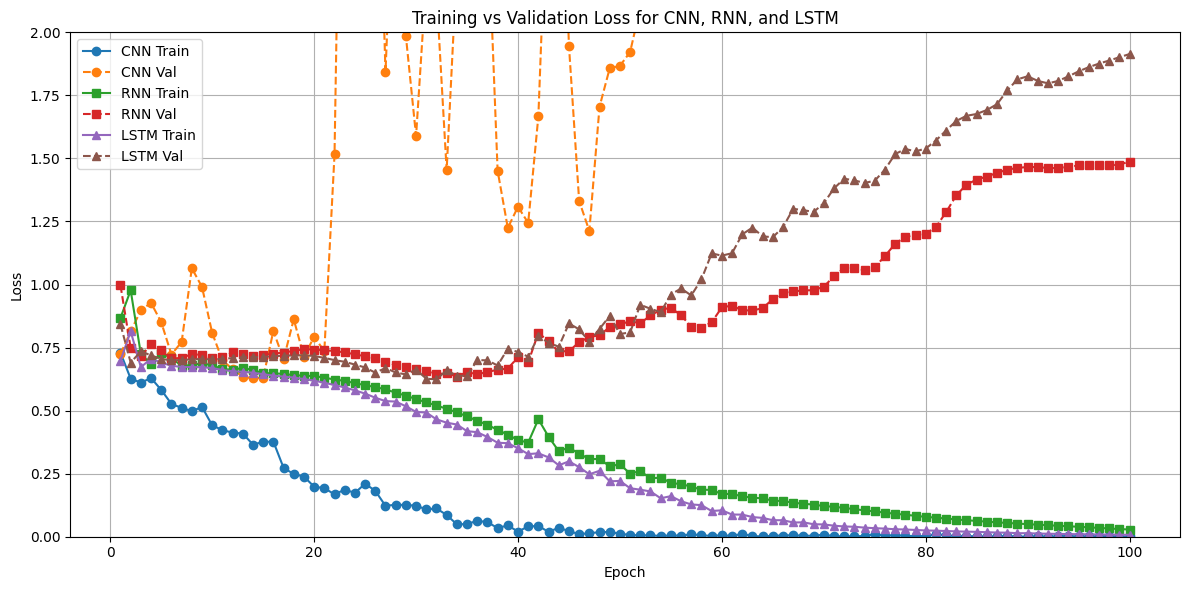

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_loss_* and val_loss_* are already obtained from run_training
epochs = np.arange(1, len(train_loss_cnn) + 1)
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_loss_cnn, label="CNN Train", linestyle='-', marker='o')
plt.plot(epochs, val_loss_cnn, label="CNN Val", linestyle='--', marker='o')

plt.plot(epochs, train_loss_rnn, label="RNN Train", linestyle='-', marker='s')
plt.plot(epochs, val_loss_rnn, label="RNN Val", linestyle='--', marker='s')

plt.plot(epochs, train_loss_lstm, label="LSTM Train", linestyle='-', marker='^')
plt.plot(epochs, val_loss_lstm, label="LSTM Val", linestyle='--', marker='^')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 2)
plt.title("Training vs Validation Loss for CNN, RNN, and LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
best_model = CNNModel(n_features, n_classes)
best_model.load_state_dict(best_model_state_cnn)
best_model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_model.to(device)

CNNModel(
  (conv1): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)

In [55]:
all_preds = []
all_labels = []

with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = best_model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Test Accuracy: 0.9250


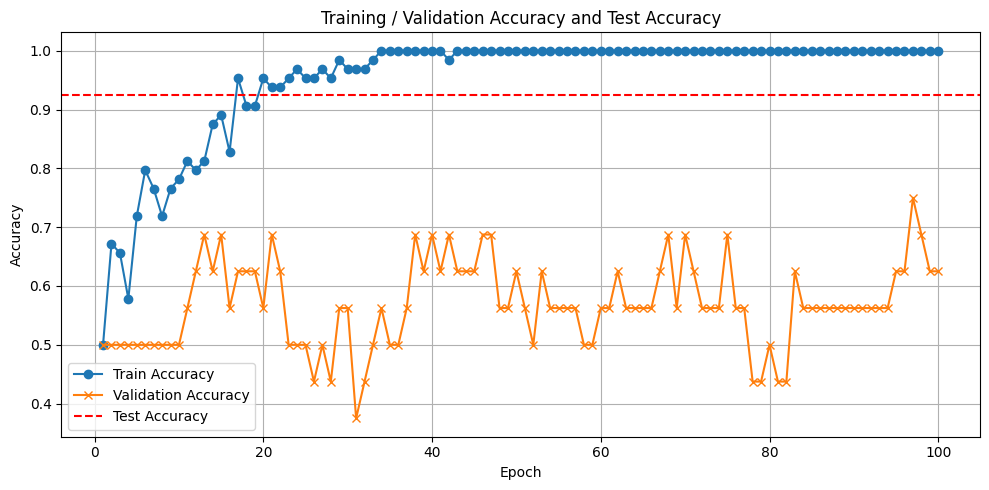

In [56]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, len(train_acc_cnn) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_cnn, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc_cnn, label='Validation Accuracy', marker='x')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training / Validation Accuracy and Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
best_model = RNNModel(n_features, 64, n_classes)  # use the same hidden_size used in training
best_model.load_state_dict(best_model_state_rnn)
best_model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_model.to(device)

RNNModel(
  (rnn): RNN(32, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)

In [58]:
all_preds = []
all_labels = []

with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = best_model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Test Accuracy: 0.9375


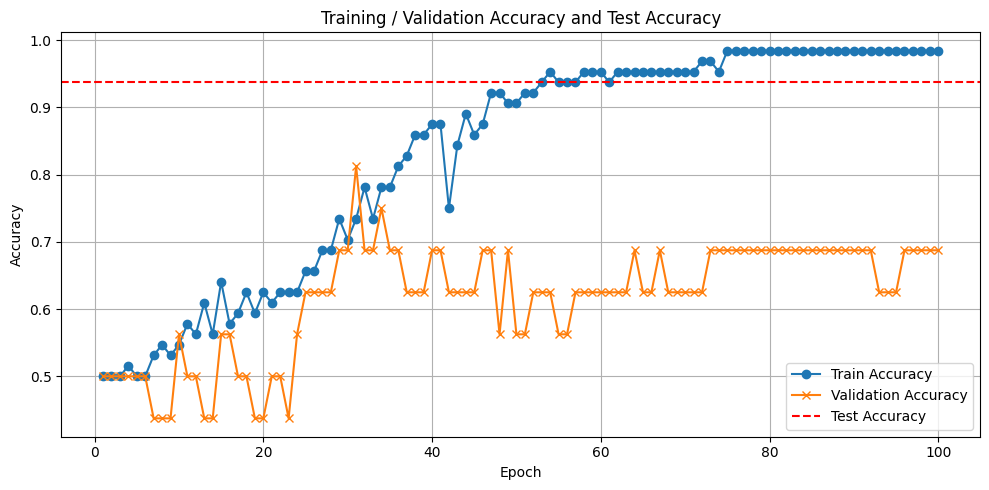

In [59]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, len(train_acc_rnn) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_rnn, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc_rnn, label='Validation Accuracy', marker='x')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training / Validation Accuracy and Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
best_model = LSTMModel(n_features, 64, n_classes)
best_model.load_state_dict(best_model_state_lstm)
best_model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_model.to(device)

LSTMModel(
  (lstm): LSTM(32, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)

In [61]:
from sklearn.metrics import accuracy_score

all_preds = []
all_labels = []

with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = best_model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Test Accuracy: 0.9125


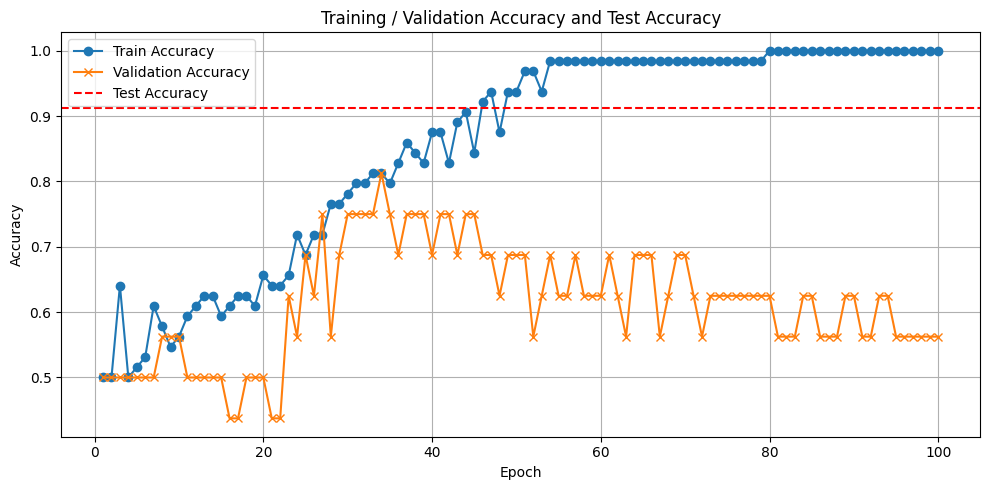

In [62]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, len(train_acc_lstm) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_lstm, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc_lstm, label='Validation Accuracy', marker='x')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training / Validation Accuracy and Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Only LSTM

In [1]:
from utils import *

In [2]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch.nn as nn

In [10]:

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes, dropout=0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            batch_first=True,
            dropout=dropout,     # applies between stacked LSTM layers
            num_layers=2         # stack 2 layers for more learning capacity
        )
        self.fc = nn.Sequential(
            nn.Dropout(dropout),  # dropout before final classification
            nn.Linear(hidden_size, n_classes)
        )

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        return self.fc(h_n[-1])  # use last layer's hidden state



▶️ Running Subject P1 Session pre
[LSTMModel] Epoch 1: Train Loss = 1.8017, Val Loss = 4.2591, Train Acc = 0.39, Val Acc = 0.25
[LSTMModel] Epoch 2: Train Loss = 2.9714, Val Loss = 1.1681, Train Acc = 0.30, Val Acc = 0.50
[LSTMModel] Epoch 3: Train Loss = 1.2615, Val Loss = 1.1211, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 4: Train Loss = 1.3865, Val Loss = 1.0641, Train Acc = 0.38, Val Acc = 0.50
[LSTMModel] Epoch 5: Train Loss = 1.3561, Val Loss = 1.1006, Train Acc = 0.35, Val Acc = 0.25
[LSTMModel] Epoch 6: Train Loss = 1.3375, Val Loss = 1.0712, Train Acc = 0.33, Val Acc = 0.50
[LSTMModel] Epoch 7: Train Loss = 1.2757, Val Loss = 1.1156, Train Acc = 0.41, Val Acc = 0.50


/Users/saracruz/Downloads/stroke-rehab/utils.py:444: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features_df = df.drop(columns="label")


[LSTMModel] Epoch 8: Train Loss = 1.2381, Val Loss = 1.0569, Train Acc = 0.46, Val Acc = 0.50
[LSTMModel] Epoch 9: Train Loss = 1.1565, Val Loss = 1.1059, Train Acc = 0.45, Val Acc = 0.25
[LSTMModel] Epoch 10: Train Loss = 1.1971, Val Loss = 1.0618, Train Acc = 0.41, Val Acc = 0.50
[LSTMModel] Epoch 11: Train Loss = 1.0931, Val Loss = 1.0659, Train Acc = 0.41, Val Acc = 0.50
[LSTMModel] Epoch 12: Train Loss = 1.2154, Val Loss = 1.0573, Train Acc = 0.42, Val Acc = 0.50
[LSTMModel] Epoch 13: Train Loss = 1.0685, Val Loss = 1.0433, Train Acc = 0.46, Val Acc = 0.50
[LSTMModel] Epoch 14: Train Loss = 1.0473, Val Loss = 1.0538, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 15: Train Loss = 1.1065, Val Loss = 1.0434, Train Acc = 0.41, Val Acc = 0.50
[LSTMModel] Epoch 16: Train Loss = 1.1692, Val Loss = 1.0526, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 17: Train Loss = 1.0671, Val Loss = 1.0403, Train Acc = 0.47, Val Acc = 0.50
[LSTMModel] Epoch 18: Train Loss = 1.0774, Val Loss 

/Users/saracruz/Downloads/stroke-rehab/utils.py:444: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features_df = df.drop(columns="label")


[LSTMModel] Epoch 9: Train Loss = 1.0763, Val Loss = 1.0480, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 10: Train Loss = 1.0498, Val Loss = 1.0411, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 11: Train Loss = 1.0511, Val Loss = 1.0424, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 12: Train Loss = 1.0488, Val Loss = 1.0446, Train Acc = 0.51, Val Acc = 0.50
[LSTMModel] Epoch 13: Train Loss = 1.0590, Val Loss = 1.0402, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 14: Train Loss = 1.0562, Val Loss = 1.0414, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 15: Train Loss = 1.0469, Val Loss = 1.0417, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 16: Train Loss = 1.0662, Val Loss = 1.0401, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 17: Train Loss = 1.0456, Val Loss = 1.0409, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 18: Train Loss = 1.0508, Val Loss = 1.0441, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 19: Train Loss = 1.0565, Val Loss

/Users/saracruz/Downloads/stroke-rehab/utils.py:444: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features_df = df.drop(columns="label")


[LSTMModel] Epoch 1: Train Loss = 2.6792, Val Loss = 1.9536, Train Acc = 0.30, Val Acc = 0.25
[LSTMModel] Epoch 2: Train Loss = 1.5420, Val Loss = 1.1110, Train Acc = 0.34, Val Acc = 0.25
[LSTMModel] Epoch 3: Train Loss = 1.1388, Val Loss = 1.0435, Train Acc = 0.45, Val Acc = 0.50
[LSTMModel] Epoch 4: Train Loss = 1.1226, Val Loss = 1.0559, Train Acc = 0.46, Val Acc = 0.50
[LSTMModel] Epoch 5: Train Loss = 1.0793, Val Loss = 1.0497, Train Acc = 0.45, Val Acc = 0.50
[LSTMModel] Epoch 6: Train Loss = 1.1178, Val Loss = 1.0446, Train Acc = 0.45, Val Acc = 0.50
[LSTMModel] Epoch 7: Train Loss = 1.1092, Val Loss = 1.0466, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 8: Train Loss = 1.0811, Val Loss = 1.0461, Train Acc = 0.42, Val Acc = 0.50
[LSTMModel] Epoch 9: Train Loss = 1.0689, Val Loss = 1.0433, Train Acc = 0.47, Val Acc = 0.50
[LSTMModel] Epoch 10: Train Loss = 1.2208, Val Loss = 1.0510, Train Acc = 0.30, Val Acc = 0.50
[LSTMModel] Epoch 11: Train Loss = 1.1761, Val Loss = 1.070

/Users/saracruz/Downloads/stroke-rehab/utils.py:444: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features_df = df.drop(columns="label")


[LSTMModel] Epoch 5: Train Loss = 1.0744, Val Loss = 1.0448, Train Acc = 0.42, Val Acc = 0.50
[LSTMModel] Epoch 6: Train Loss = 1.1016, Val Loss = 1.0406, Train Acc = 0.47, Val Acc = 0.50
[LSTMModel] Epoch 7: Train Loss = 1.0727, Val Loss = 1.0442, Train Acc = 0.46, Val Acc = 0.50
[LSTMModel] Epoch 8: Train Loss = 1.0897, Val Loss = 1.0412, Train Acc = 0.43, Val Acc = 0.50
[LSTMModel] Epoch 9: Train Loss = 1.0665, Val Loss = 1.0407, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 10: Train Loss = 1.0957, Val Loss = 1.0455, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 11: Train Loss = 1.0789, Val Loss = 1.0477, Train Acc = 0.51, Val Acc = 0.50
[LSTMModel] Epoch 12: Train Loss = 1.0585, Val Loss = 1.0464, Train Acc = 0.49, Val Acc = 0.50
[LSTMModel] Epoch 13: Train Loss = 1.0802, Val Loss = 1.0454, Train Acc = 0.43, Val Acc = 0.50
[LSTMModel] Epoch 14: Train Loss = 1.0866, Val Loss = 1.0402, Train Acc = 0.46, Val Acc = 0.50
[LSTMModel] Epoch 15: Train Loss = 1.0599, Val Loss = 1

/Users/saracruz/Downloads/stroke-rehab/utils.py:444: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features_df = df.drop(columns="label")


[LSTMModel] Epoch 3: Train Loss = 1.1310, Val Loss = 1.0468, Train Acc = 0.46, Val Acc = 0.50
[LSTMModel] Epoch 4: Train Loss = 1.0814, Val Loss = 1.0488, Train Acc = 0.47, Val Acc = 0.50
[LSTMModel] Epoch 5: Train Loss = 1.1068, Val Loss = 1.0424, Train Acc = 0.41, Val Acc = 0.50
[LSTMModel] Epoch 6: Train Loss = 1.0860, Val Loss = 1.0628, Train Acc = 0.45, Val Acc = 0.50
[LSTMModel] Epoch 7: Train Loss = 1.1125, Val Loss = 1.0445, Train Acc = 0.48, Val Acc = 0.50
[LSTMModel] Epoch 8: Train Loss = 1.1236, Val Loss = 1.0484, Train Acc = 0.38, Val Acc = 0.50
[LSTMModel] Epoch 9: Train Loss = 1.1274, Val Loss = 1.0514, Train Acc = 0.39, Val Acc = 0.50
[LSTMModel] Epoch 10: Train Loss = 1.1009, Val Loss = 1.0438, Train Acc = 0.42, Val Acc = 0.50
[LSTMModel] Epoch 11: Train Loss = 1.0494, Val Loss = 1.0492, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 12: Train Loss = 1.0317, Val Loss = 1.0401, Train Acc = 0.49, Val Acc = 0.50
[LSTMModel] Epoch 13: Train Loss = 1.0917, Val Loss = 1.0

/Users/saracruz/Downloads/stroke-rehab/utils.py:444: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features_df = df.drop(columns="label")


[LSTMModel] Epoch 3: Train Loss = 1.0835, Val Loss = 1.0602, Train Acc = 0.44, Val Acc = 0.50
[LSTMModel] Epoch 4: Train Loss = 1.0827, Val Loss = 1.0476, Train Acc = 0.47, Val Acc = 0.50
[LSTMModel] Epoch 5: Train Loss = 1.0609, Val Loss = 1.0425, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 6: Train Loss = 1.0589, Val Loss = 1.0529, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 7: Train Loss = 1.0916, Val Loss = 1.0466, Train Acc = 0.49, Val Acc = 0.50
[LSTMModel] Epoch 8: Train Loss = 1.0544, Val Loss = 1.0405, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 9: Train Loss = 1.0770, Val Loss = 1.0418, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 10: Train Loss = 1.0471, Val Loss = 1.0417, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 11: Train Loss = 1.0754, Val Loss = 1.0407, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 12: Train Loss = 1.0509, Val Loss = 1.0430, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 13: Train Loss = 1.0485, Val Loss = 1.0

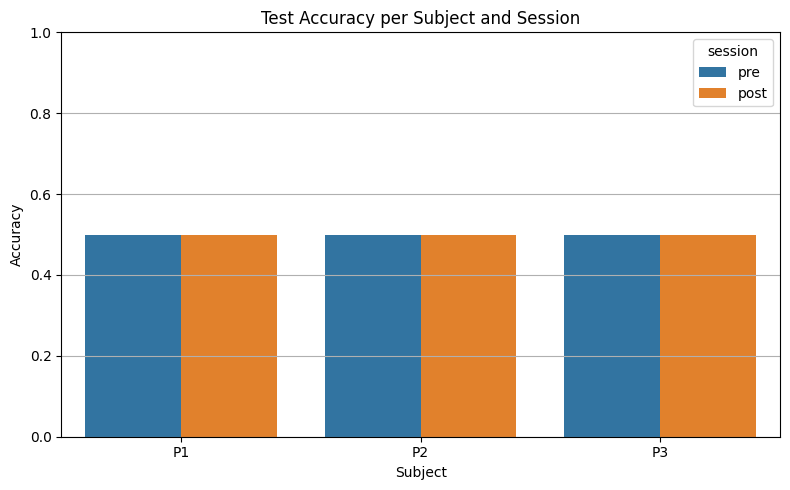

In [11]:
import os
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Define constants
subjects = [1, 2, 3]
sessions = ['pre', 'post']
conditions = ['training', 'test']

accuracies = []
conf_matrices = []

# Loop through all subject, session, and condition combinations
for sub in subjects:
    for sess in sessions:
        print(f"\n▶️ Running Subject P{sub} Session {sess}")

        # Load training and test data
        try:
            df_train = pd.read_pickle(f'/Users/saracruz/Downloads/stroke-rehab/Dataset/P{sub}_{sess}_training.pkl')
            df_test = pd.read_pickle(f'/Users/saracruz/Downloads/stroke-rehab/Dataset/P{sub}_{sess}_test.pkl')
        except FileNotFoundError:
            print(f"⚠️ Files for P{sub} {sess} not found.")
            continue

        # Label mapping and reshaping
        df_train = map_labels_to_segments(df_train)
        df_test = map_labels_to_segments(df_test)

        reshaped_array, labels = reshape_features_by_segment(df_train)
        reshaped_array_test, labels_test = reshape_features_by_segment(df_test)

        label_encoder = LabelEncoder()
        encoded_labels = label_encoder.fit_transform(labels)
        encoded_labels_test = label_encoder.transform(labels_test)

        # Split into train/val
        X_train, X_val, y_train, y_val = train_test_split(
            reshaped_array, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42
        )

        # Build datasets
        train_dataset = EEGDataset(X_train, y_train)
        val_dataset = EEGDataset(X_val, y_val)
        test_dataset = EEGDataset(reshaped_array_test, encoded_labels_test)

        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

        sample_input = train_loader.dataset[0][0]
        n_windows, n_features = sample_input.shape
        n_classes = len(np.unique(encoded_labels))

        # Train LSTM model
        train_loss, val_loss, train_acc, val_acc, best_model_state = run_training(
            LSTMModel, (n_features, 64, n_classes), train_loader, val_loader, lr=0.1
        )

        # Load best model
        best_model = LSTMModel(n_features, 64, n_classes)
        best_model.load_state_dict(best_model_state)
        best_model.eval()
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        best_model.to(device)

        # Evaluate on test set
        all_preds, all_labels = [], []
        with torch.no_grad():
            for data, labels in test_loader:
                data, labels = data.to(device), labels.to(device)
                outputs = best_model(data)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        #cm = confusion_matrix(all_labels, all_preds)
        print(f"✅ Test Accuracy for P{sub} {sess}: {acc:.4f}")

        accuracies.append({
            'subject': f'P{sub}',
            'session': sess,
            'accuracy': acc
        })
        #conf_matrices.append((f"P{sub}_{sess}", cm))

# Plot barplot of test accuracies
acc_df = pd.DataFrame(accuracies)
plt.figure(figsize=(8, 5))
sns.barplot(data=acc_df, x='subject', y='accuracy', hue='session')
plt.ylim(0, 1)
plt.title("Test Accuracy per Subject and Session")
plt.ylabel("Accuracy")
plt.xlabel("Subject")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [4]:
df = pd.read_pickle('/Users/saracruz/Downloads/stroke-rehab/Dataset/P3_post_training.pkl')
df_test = pd.read_pickle('/Users/saracruz/Downloads/stroke-rehab/Dataset/P3_post_test.pkl')
features_df = df.drop(columns="label")
features_df = map_labels_to_segments(df)
features_df_test = map_labels_to_segments(df_test)
reshaped_array, labels = reshape_features_by_segment(features_df)
reshaped_array_test, labels_test = reshape_features_by_segment(features_df_test)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
# e.g., {'baseline': 0, 'left': 1, 'right': 2}
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# Split into train and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(reshaped_array, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42)
train_dataset = EEGDataset(X_train, y_train)
val_dataset = EEGDataset(X_val, y_val)
encoded_labels_test = label_encoder.transform(labels_test)
test_dataset = EEGDataset(reshaped_array_test, encoded_labels_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
sample_input = train_loader.dataset[0][0]  # shape: (n_windows, n_features)
n_windows = sample_input.shape[0]
n_features = sample_input.shape[1]
n_classes = 3
train_loss_lstm, val_loss_lstm, train_acc_lstm, val_acc_lstm, best_model_state = run_training(LSTMModel, (n_features, 64, n_classes), train_loader, val_loader, lr = 0.01)
best_model = LSTMModel(n_features, 64, n_classes)
best_model.load_state_dict(best_model_state)
best_model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_model.to(device)
all_preds = []
all_labels = []

with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = best_model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

/Users/saracruz/Downloads/stroke-rehab/utils.py:444: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features_df = df.drop(columns="label")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[LSTMModel] Epoch 1: Train Loss = 1.1292, Val Loss = 1.0410, Train Acc = 0.42, Val Acc = 0.50
[LSTMModel] Epoch 2: Train Loss = 1.0403, Val Loss = 1.0457, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 3: Train Loss = 1.0449, Val Loss = 1.0434, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 4: Train Loss = 1.0475, Val Loss = 1.0396, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 5: Train Loss = 1.0559, Val Loss = 1.0391, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 6: Train Loss = 1.0525, Val Loss = 1.0402, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 7: Train Loss = 1.0420, Val Loss = 1.0395, Train Acc = 0.50, Val Acc = 0.50
[LSTMModel] Epoch 8: Train Loss = 1.0505, Val Loss = 1.0385, Train Acc = 0.50, Val Acc = 0.5

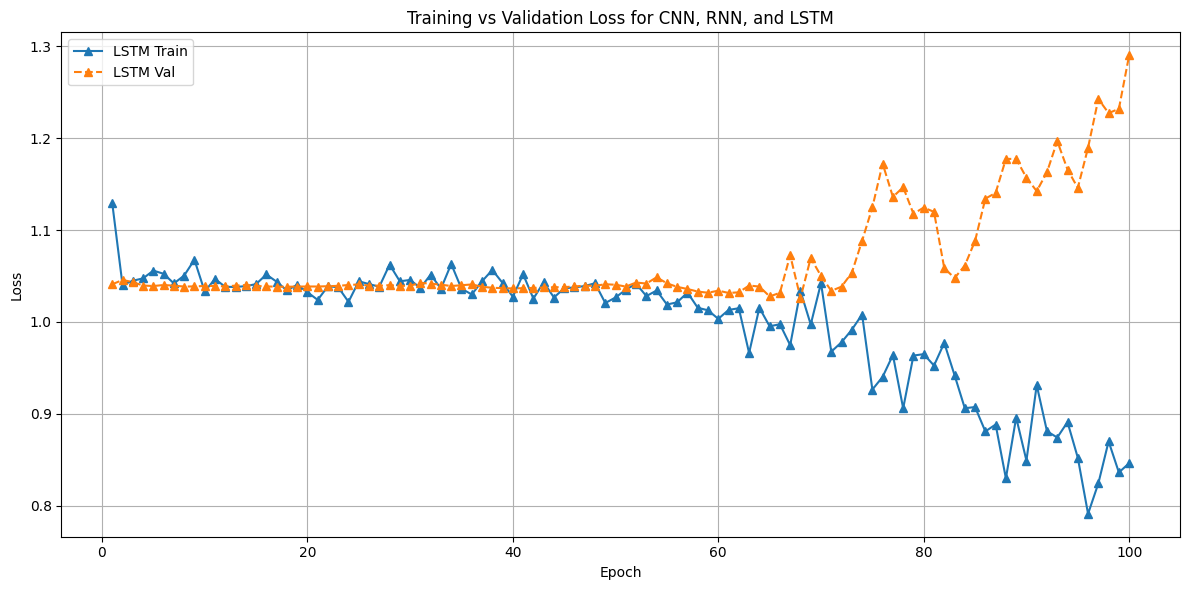

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_loss_* and val_loss_* are already obtained from run_training
epochs = np.arange(1, len(train_loss_lstm) + 1)
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_loss_lstm, label="LSTM Train", linestyle='-', marker='^')
plt.plot(epochs, val_loss_lstm, label="LSTM Val", linestyle='--', marker='^')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss for CNN, RNN, and LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

all_preds = []
all_labels = []

with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = best_model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")


✅ Test Accuracy: 0.4750


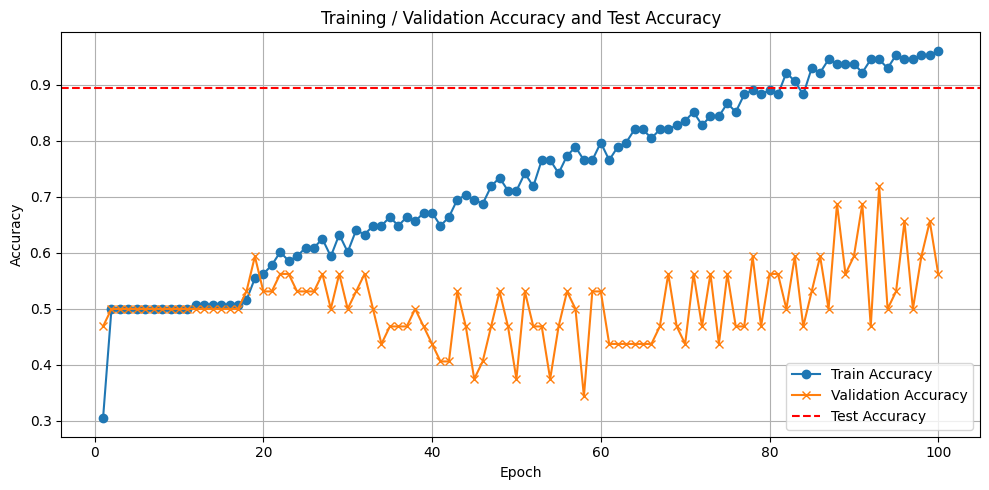

In [40]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, len(train_acc_lstm) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_lstm, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc_lstm, label='Validation Accuracy', marker='x')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training / Validation Accuracy and Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def train_validate(model, device, train_loader, validate_loader, optimizer, epoch, criterion):
    model.to(device)
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        target = target[0,:,:]
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    #print(f"Epoch {epoch + 1},Train Loss: {train_loss / len(train_loader)}")
    model.eval()
    eval_loss = 0
    with torch.no_grad():
      for batch_idx, (data, target) in enumerate(validate_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        target = target[0,:,:]
        loss = criterion(output, target)
        eval_loss+=loss.item()
      #print(f"Epoch {epoch + 1},Validate Loss: {train_loss / len(validate_loader)}")
    #maybe something about saving a model, what criteria of model saving?
    return train_loss / len(train_loader), eval_loss/len(validate_loader)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = []
y = []

# Function to flatten nested feature arrays
def flatten_features(cell):
    features = []
    for val in cell:
        if isinstance(val, np.ndarray):
            features.extend(val.flatten())
        else:
            features.append(val)
    return features

# Loop through each label column
for label in ['Baseline', 'Left', 'Right']:
    for row in dataset[label]:
        features = flatten_features(row)
        X.append(features)
        y.append(label)

# Convert to array
X = pd.DataFrame(X)
y = pd.Series(y)

# Sanity check
print(X.shape, y.value_counts())


(96, 30) Baseline    32
Left        32
Right       32
Name: count, dtype: int64


In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,4.85821,5.126335,6.457161,3.815081,3.509394,3.947559,2.746372,3.093983,3.176694,2.999694,...,5.365592,6.095199,5.767239,5.731628,5.660361,4.351255,4.118787,3.668276,2.891417,2.175396
1,7.236645,7.362752,7.682533,4.640474,3.296389,3.739287,3.537753,4.074288,5.839418,8.207816,...,2.966980,2.952041,2.978312,2.962609,3.561873,3.571776,5.039320,4.809849,3.753857,2.961680
2,5.025091,5.222847,5.712562,3.632423,2.706983,3.145541,3.132230,3.299662,5.178932,8.185655,...,2.010757,2.140920,2.204252,2.479882,3.066702,2.846820,3.670694,3.492862,2.566169,2.128139
3,3.981997,4.224303,4.850051,3.151739,2.683384,3.447218,3.357926,3.661790,5.948041,9.153702,...,2.634344,2.407711,2.482710,2.563532,2.995506,2.808325,3.444158,3.259968,2.449152,2.069929
4,2.770351,4.153672,4.842830,3.871467,4.601305,5.807821,4.589081,4.433264,3.761996,2.410636,...,5.555732,5.660793,5.235628,3.661683,2.387693,1.821256,1.313697,1.317274,1.089474,0.847641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"[-0.04529373095687916, -0.011152587079628566, ...","[0.5132559408634741, 0.4651103893170575, 0.496...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,"[-0.022525730249711034, -0.10443944099774662, ...","[0.46074294960402373, 0.7931325773156607, 0.88...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,"[0.040619355151787946, 0.06878428722003455, -0...","[0.5319682655523599, 0.5256662432491295, 0.521...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,"[0.007336885371144284, -0.1333391380929887, 0....","[0.6720578510768678, 0.46080818295249226, 0.83...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dataset

Baseline  \
freq_features FC3  [[4.858209929172532, 5.126335320250879, 6.4571...   
              FCz  [[7.236645025522932, 7.36275232823243, 7.68253...   
              FC4  [[5.02509091295923, 5.222847421634349, 5.71256...   
              C5   [[3.981997260742398, 4.224302614662565, 4.8500...   
              C3   [[2.77035127685846, 4.153671740238297, 4.84282...   
              C1   [[4.817911255331041, 5.688287156677714, 6.0132...   
              Cz   [[23.57257841662798, 25.096000359430242, 24.53...   
              C2   [[11.012745928274898, 11.39082537994884, 11.81...   
              C4   [[10.245084561747726, 10.881614706767472, 11.0...   
              C6   [[7.131606441453116, 7.64327922487669, 8.02026...   
              CP3  [[5.508739861040462, 5.732374024437178, 6.0092...   
              CP1  [[1.9387838838274523, 2.436499641207133, 2.647...   
              CPz  [[13.509648503472189, 14.588617237980895, 15.0...   
              CP2  [[15.961660815773111, 18.57999963835843, 19.30...   
              CP4  [[7.164875824243323, 8.466280325913877, 8.7189...   
              Pz   [[2.9022500780673615, 3.185900241343739, 3.277...   
mstd_features FC3  [[-0.18519590321081136, 0.1590109097933956, -0...   
              FCz  [[-0.23609563256739208, 0.07653146179410726, 0...   
              FC4  [[-0.1853935454608699, 0.04814268001086072, 0....   
              C5   [[-0.16060520916657622, 0.05399538171543496, 0...   
              C3   [[-0.2062046930644792, 0.1352128765868389, 0.0...   
              C1   [[-0.22612372258132132, 0.189847781123185, -0....   
              Cz   [[-0.43515061523319565, 0.15925426386686684, 0...   
              C2   [[-0.264015808796677, 0.10921222686349048, 0.1...   
              C4   [[-0.24820093853231065, 0.08712466380668976, 0...   
              C6   [[-0.16965627139989597, 0.0710461575179409, 0....   
              CP3  [[-0.09736544649857005, 0.037572463112495846, ...   
              CP1  [[-0.05089915121786117, 0.03603825620352924, 0...   
              CPz  [[-0.19369653353561908, 0.06842798522401097, 0...   
              CP2  [[-0.247977763293467, 0.05493642678111739, 0.1...   
              CP4  [[-0.0876190757852064, 0.023385733877114182, 0...   
              Pz   [[-0.07401885327616546, -0.00605611218276012, ...   

                                                                Left  \
freq_features FC3  [[2.373329810447806, 3.701957228706108, 4.9994...   
              FCz  [[2.634403454370958, 6.494390625383158, 12.243...   
              FC4  [[4.322324629484138, 8.152482941715505, 13.678...   
              C5   [[6.8310757006126215, 11.729429425024378, 17.5...   
              C3   [[2.314946253039188, 5.325271153681807, 8.1780...   
              C1   [[3.0838250596101937, 5.374539933252617, 7.704...   
              Cz   [[3.6295766477862528, 7.317939607927702, 13.43...   
              C2   [[5.214256395354797, 10.025973728377823, 18.56...   
              C4   [[8.402471463286366, 14.276187545385538, 21.77...   
              C6   [[11.510478014144088, 20.4529790887437, 30.080...   
              CP3  [[11.432515230742895, 18.029930244512677, 26.6...   
              CP1  [[6.010903117610638, 9.633987608400165, 14.988...   
              CPz  [[7.274292318307618, 10.695410802891965, 18.24...   
              CP2  [[1.6106879073074056, 3.148018452595758, 6.220...   
              CP4  [[12.518311660081116, 19.533994119912276, 27.8...   
              Pz   [[5.929542463249408, 9.138168640769893, 15.414...   
mstd_features FC3  [[-0.0213903549886992, 0.01372763647374054, -0...   
              FCz  [[-0.04863976660176359, -0.002628086763478681,...   
              FC4  [[-0.05884255684001848, 0.004070051085108872, ...   
              C5   [[-0.08607140059407219, 0.03693895934936947, 0...   
              C3   [[0.016695833975220117, 0.0917559550220817, 0....   
              C1   [[-0.14168384014228327, 0.02263389373855866, 0...   
              Cz   [[-0.157

In [ ]:
import os
import pandas as pd
import numpy as np
import scipy.io
import mne

for sub in n_sub:
    for cond in condition:
        for ses in session:
            filepath = f"/Users/saracruz/Downloads/stroke-rehab/P{sub}_{ses}_{cond}.mat"
            savepath = f"/Users/saracruz/Downloads/stroke-rehab/Dataset/P{sub}_{ses}_{cond}.pkl"

            # Load .mat
            data = scipy.io.loadmat(filepath)
            y = data['y']
            trig = data['trig'].flatten()
            sfreq = data['fs'].item()

            # Preprocess with MNE
            raw, sfreq = build_mne_object_from_data(y, channels_to_use, sfreq)
            montage = mne.channels.make_standard_montage('standard_1020')
            raw.set_montage(montage)

            # Filter
            iir_params = dict(order=50, ftype='butter')
            raw.filter(l_freq=8., h_freq=30., method='iir', iir_params=iir_params)

            # Events
            new_trig = extract_clean_events(trig, sfreq)
            event_indices = np.arange(len(new_trig))
            event_codes = new_trig
            new_events = np.column_stack((event_indices, np.zeros_like(event_indices), event_codes)).astype(int)

            epochs = mne.Epochs(
                raw, new_events,
                baseline=(None, None),
                tmin=0,
                tmax=1.5,
                event_id=event_dict,
                preload=True
            )

            all_rows = []
            all_labels = []

            for label_name, event_id in event_dict.items():
                label_epochs = epochs[label_name].get_data()  # Shape: (n_epochs, n_channels, n_times)

                for ep in label_epochs:
                    # Feature extraction
                    power_vec, power_labels = extract_power_features(ep, freqs, freq_bins, channels_to_use)
                    temp_vec, temp_labels = extract_temp_features(ep, sfreq, channels_to_use)

                    features = np.concatenate([power_vec, temp_vec])
                    labels = power_labels + temp_labels

                    all_rows.append(features)
                    all_labels.append(label_name)

            # Create MultiIndex for columns
            col_index = pd.MultiIndex.from_tuples(labels, names=["feature_type", "channel", "detail"])
            df = pd.DataFrame(all_rows, columns=col_index)
            df["label"] = all_labels

            # Save
            os.makedirs(os.path.dirname(savepath), exist_ok=True)
            #df.to_pickle(savepath)


In [21]:
from utils import *

In [10]:
filepath = "P1_post_training.mat"
#savepath = f"/Users/saracruz/Downloads/stroke-rehab/Dataset/P{sub}_{ses}_{cond}.pkl"

# Load .mat
data = scipy.io.loadmat(filepath)
y = data['y']
trig = data['trig'].flatten()
sfreq = data['fs'].item()

# Preprocess with MNE
raw, sfreq = build_mne_object_from_data(y, channels_to_use, sfreq)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Filter
iir_params = dict(order=50, ftype='butter')
raw.filter(l_freq=8., h_freq=30., method='iir', iir_params=iir_params)

# Events
new_trig = extract_clean_events(trig, sfreq)
event_indices = np.arange(len(new_trig))
event_codes = new_trig
new_events = np.column_stack((event_indices, np.zeros_like(event_indices), event_codes)).astype(int)

epochs = mne.Epochs(
    raw, new_events,
    baseline=(None, None),
    tmin=0,
    tmax=1.5,
    event_id=event_dict,
    preload=True
)

all_rows = []
all_labels = []

for label_name, event_id in event_dict.items():
    label_epochs = epochs[label_name]  # Shape: (n_epochs, n_channels, n_times)
    print(label_epochs)

    for i in range(len(label_epochs)):
        single_epoch = label_epochs[i:i+1]  # MNE Epochs object with one epoch

        # Extract features
        power_vec, power_labels = extract_power_features(single_epoch, freqs, freq_bins, channels_to_use)
        temp_vec, temp_labels = extract_temp_features(single_epoch.get_data()[0], sfreq, channels_to_use)

        features = np.concatenate([power_vec, temp_vec])
        labels = power_labels + temp_labels

        all_rows.append(features)
        all_labels.append(label_name)

# Create MultiIndex for columns
col_index = pd.MultiIndex.from_tuples(labels, names=["feature_type", "channel", "detail"])
df = pd.DataFrame(all_rows, columns=col_index)
df["label"] = all_labels

# Save
#os.makedirs(os.path.dirname(savepath), exist_ok=True)
#df.to_pickle(savepath)


Creating RawArray with float64 data, n_channels=16, n_times=197343
    Range : 0 ... 197342 =      0.000 ...   770.867 secs
Ready.
Frequency of Sampling: 256.0 Hz
Duration: 770.87109375 seconds
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 200 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB



/Users/saracruz/opt/anaconda3/envs/labs/lib/python3.13/site-packages/scipy/signal/_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


Not setting metadata
160 matching events found
Setting baseline interval to [0.0, 1.5] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 385 original time points ...
0 bad epochs dropped
<Epochs | 80 events (all good), 0 – 1.5 s (baseline 0 – 1.5 s), ~3.8 MiB, data loaded,
 'Baseline': 80>
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
NOTE: tfr_multitaper() is a legacy fu

In [11]:
df

feature_type               power                                          \
channel                      FC3                                           
detail       8.0-12.0Hz_0.0-0.1s 8.0-12.0Hz_0.1-0.2s 8.0-12.0Hz_0.2-0.3s   
0                     128.973129          363.740072          901.984508   
1                     230.551005          562.629027         1009.297690   
2                      47.090462          153.313855          345.613617   
3                      39.622359           61.950467          136.003079   
4                     175.949507          192.069659          340.066355   
..                           ...                 ...                 ...   
155                   245.489828          367.903777          424.453110   
156                   559.878536          751.801311          772.487556   
157                   233.846661          442.890331          847.339203   
158                   716.988728          974.255178         1152.610825   
159                    51.048488          131.027933          434.044438   

feature_type                                                              \
channel                                                                    
detail       8.0-12.0Hz_0.3-0.4s 8.0-12.0Hz_0.4-0.5s 8.0-12.0Hz_0.5-0.6s   
0                     993.664449          992.462632          874.878321   
1                    1357.999590         1683.492899         1789.396770   
2                     395.813128          387.094408          332.885614   
3                     173.366057          169.437146          206.835356   
4                     316.191271          280.668556          288.821043   
..                           ...                 ...                 ...   
155                   379.910382          316.423847          161.589854   
156                   681.266306          399.459744          266.343375   
157                   995.645088         1011.157767          880.351499   
158                  1080.587638          811.174787          702.528776   
159                   815.077050          845.359178          853.884715   

feature_type                                                              \
channel                                                                    
detail       8.0-12.0Hz_0.6-0.7s 8.0-12.0Hz_0.7-0.8s 8.0-12.0Hz_0.8-0.9s   
0                     366.253189          123.395912          156.368738   
1                    1540.178874         1118.514615         1020.612088   
2                     261.649656          233.677549          317.863521   
3                     282.742572          273.906126          309.576616   
4                     169.383101          120.025508          206.350336   
..                           ...                 ...                 ...   
155                   123.602472           93.652831          125.313592   
156                   286.001183          310.906589          345.128481   
157                   497.092929          183.349500          108.264472   
158                   603.606460          498.448110          390.719497   
159                   622.633975          274.876071          383.455671   

feature_type                      ...       temp                         \
channel                           ...         Pz                          
detail       8.0-12.0Hz_0.9-1.0s  ... std_seg_10 mean_seg_11 std_seg_11   
0                     243.321768  ...   6.380523   -0.433241   6.879728   
1                     793.674554  ...   7.443016   -0.221753   4.287491   
2                     520.541289  ...   4.663984   -0.100787   4.981732   
3                     299.621875  ...   4.120758    0.188378   4.207423   
4                     250.955422  ...   8.641862    1.237953   9.335475   
..                           ...  ...        ...         ...        ...   
155                   167.320958  ...   1.405068    0.585994   4.615647   
156                   245.523002  ...   2.273476    0.2